<a href="https://colab.research.google.com/github/xumeiying/Stats_II/blob/master/Stats_II_Probset_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 4 GOV 391L, Spring 2020

In [82]:
# load packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import math 

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from matplotlib import rc
import seaborn as sns

!pip install stargazer 
from stargazer.stargazer import Stargazer
from IPython.core.display import Latex

mypath = r'/content/drive/My Drive/Colab Notebooks/Stat_II_probsets/'

## 1.  Load the `corruption.csv` file from Canvas


---



### (a)  Create scatterplots plotting corruption (`corruption`) against economic freedom (`econfreedom`), inequality (`inequality`) and gdp per capita (`gdppc`) (separately).  Based on theseplots, what are your preliminary thoughts on using OLS to estimate the relationship between those three variables and corruption?



In [83]:
corruption_data =  pd.read_csv(mypath + r"corruption.csv")
corruption_data[["country","corruption", "inequality", "gdppc", "econfreedom"]]

,country,corruption,inequality,gdppc,econfreedom
0,Afghanistan,64.000626,7.2,1282.6400,48.900002
1,Albania,57.146229,4.2,8516.7002,66.900002
2,Algeria,60.690224,6.0,5402.1699,50.799999
3,Angola,67.149948,9.6,3771.2000,47.700001
4,Argentina,63.824677,5.4,15102.6100,44.599998
...,...,...,...,...,...
151,Uruguay,31.055574,4.2,12804.8400,69.300003
152,Uzbekistan,62.070217,7.0,7370.7202,46.500000
153,Venezuela,68.306488,6.7,10513.9600,36.299999
154,Vietnam,54.878067,5.5,4147.5698,50.799999


<function matplotlib.pyplot.show>

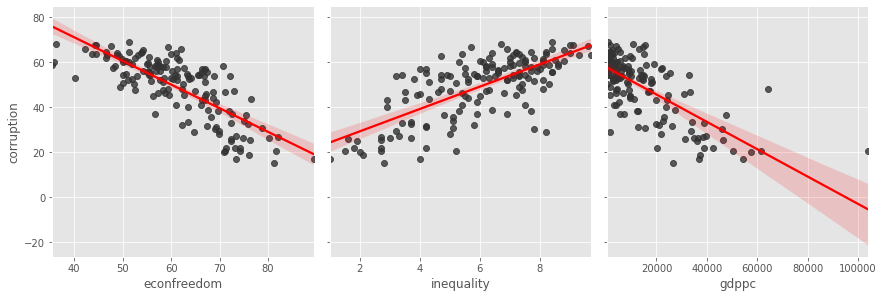

In [84]:
corrpt_g = sns.PairGrid(corruption_data, y_vars=["corruption"], x_vars=["econfreedom", "inequality", "gdppc"], height=4)
corrpt_g.map(sns.regplot, color="0.2", line_kws={'color':'red'})
plt.style.use('ggplot') 
plt.show

### (b) Estimate a model using OLS regressing corruption on economic freedom, inequality and gdp per capita. Report your results in a table and comment on them.


In [85]:
corrpt_m1 = smf.ols(formula = "corruption ~ econfreedom + inequality + gdppc", data=corruption_data).fit()
print(corrpt_m1.summary())

                            OLS Regression Results                            
Dep. Variable:             corruption   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.80e-41
Time:                        17:08:17   Log-Likelihood:                -530.10
No. Observations:                 156   AIC:                             1068.
Df Residuals:                     152   BIC:                             1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      83.9223      6.733     12.465      

### (c) Calculate the hat values for the model and plot them with a line indicting the cut-off value for unusual cases.

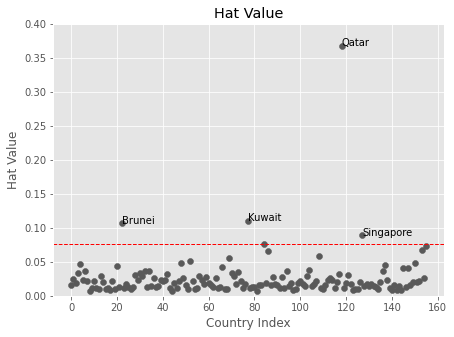

In [86]:
from statsmodels.stats.outliers_influence import OLSInfluence
hat_val = pd.DataFrame(OLSInfluence(corrpt_m1).hat_matrix_diag)
hat_val.columns=["hat_values"]
hat_val_cutoff = 3 * ((3+1)/156)
country = corruption_data[["country"]]
hat_val_table =  pd.concat([country, hat_val], axis=1)

leverage = pd.Series(hat_val["hat_values"]).sort_values(ascending = False)[:4]

# plot 
fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(hat_val.index, hat_val_table["hat_values"], color="0.35")
plt.axhline(y=hat_val_cutoff, color='r', linestyle='--', linewidth=1)
ax.set_ylim(0, 0.4)
ax.set_ylabel("Hat Value")
ax.set_xlabel('Country Index')
ax.set_title("Hat Value")
plt.style.use("ggplot") 
for i in leverage.index:
    ax.annotate(country.country[i],xy=(hat_val.index[i], leverage[i]))
plt.show()

### (d) List the countries and hat values for any observation(s) above the threshold.



In [87]:
hat_val_table[(hat_val_table["hat_values"] > 0.0769)]

,country,hat_values
22,Brunei,0.106513
77,Kuwait,0.109815
118,Qatar,0.368247
127,Singapore,0.088790


### (e) What does it mean if a hat value is above the cut-off value?

It means that 

### (f) Calculate the studentized residuals for the model and plot them with lines indicating the cut-off values for unusual cases.

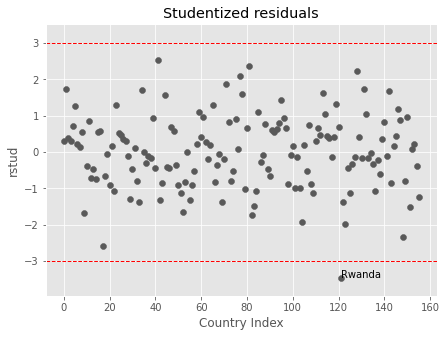

In [88]:
# get cut-off value
student_residuals = pd.Series(corrpt_m1.get_influence().resid_studentized_external)
student_residuals.index = corrpt_m1.resid.index
student_resid_top7 = abs(student_residuals).sort_values(ascending = False)[:7]
# smoothed = lowess(sqrt_student_residuals, corrpt_m1_fitval)

# plot 
fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(student_residuals.index, student_residuals, color="0.35")

# plot cutoff line
plt.axhline(y=3, color='r', linestyle='--', linewidth=1 )
plt.axhline(y=-3, color='r', linestyle='--', linewidth=1 )

ax.set_ylabel('rstud')
ax.set_xlabel('Country Index')
ax.set_title('Studentized residuals')
ax.set_ylim(min(student_residuals)-0.5, max(student_residuals)+1)

# annotate outliers
for i in rstud_outlier.index:
    ax.annotate(country.country[i],xy=(student_residuals.index[i], student_residuals[i]))
plt.show()

### (g) List the countries and studentized residuals for any observation(s) above the top threshold or below the lower threshold.

In [89]:
df_rstud = pd.DataFrame(student_residuals, columns=["rstud"])
rstud_table =  pd.concat([country, df_rstud], axis=1)
rstud_outlier1 = rstud_table[(rstud_table["rstud"] > 3)]
rstud_outlier2 = rstud_table[(rstud_table["rstud"] <-3)]
rstud_outlier = pd.concat([rstud_outlier1, rstud_outlier2], axis=0)
rstud_outlier

,country,rstud
121,Rwanda,-3.456881


### (h) What does it mean if a studentized residual is outside the cut-off values?

A studentized residual (sometimes referred to as an "externally studentized residual" or a "deleted t residual") is:

$$e_{i}=\frac{e_{i}}{s_{e(-i)} \sqrt{1-h_{i}}} \\ or \\  e_{i}=e_{i}^s \sqrt{ \frac{n-k-2}{n-k-1-e_{i}^{s^2}} } $$

If an observation has a studentized residual that is larger than 3 (in absolute value) we can call it an outlier.


### (i) Plot the hat values against the studentized residuals and draw lines at the appropriate cut off points. What does this plot suggest about unusual cases?

The plot shows that Rwanda has the largest studentized residuals (-3.457) above the cut off line.


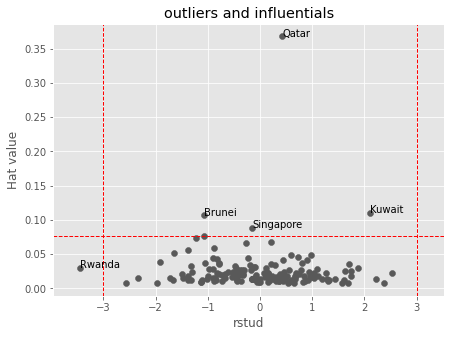

In [90]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(df_rstud, hat_val, color="0.35")
plt.axvline(x=3, color='r', linestyle='--', linewidth=1 )
plt.axvline(x=-3, color='r', linestyle='--', linewidth=1 )
plt.axhline(y=hat_val_cutoff, color='r', linestyle='--', linewidth=1)
ax.set_xlabel('rstud')
ax.set_ylabel('Hat value')
ax.set_title('outliers and influentials')
ax.set_xlim(min(df_rstud.values)-0.5, max(df_rstud.values)+1)
for i in leverage.index:
    ax.annotate(country.country[i],xy=(df_rstud.rstud[i], hat_val.hat_values[i]))
for i in rstud_outlier.index:
    ax.annotate(country.country[i],xy=(df_rstud.rstud[i], hat_val.hat_values[i]))
plt.show()

### (j) Calculate the DFBETAS for your model and present a table listing the countries and DFBETAS for any observations where one of the three explanatory variables exceeds the appropriate cut-off value. Comment briefly on what these results mean.

The DFBETAS are statistics that indicate the effect that deleting each observation has on the estimates for the regression coefficients. 

In this model, the cutoff value is $\frac{2}{\sqrt156} = 0.160$

- For the `econfreedom` variable, the most influential observations are Colombia, Iran, Lybia, Zimbabwe;
- For the `inequality` variable, the most influential observations are Colombia, Finland, Kuwait, Libya, Paraguay;  
-  For the `gdppc` variable, the most influential observations are
Kuwait, Qatar, United State.  

Notice that Kuwait and Colombia are influential for more than one estimate. Excluding those observations causes several parameter estimates to change substantially.

In [91]:
import math

dfbetas = pd.DataFrame(OLSInfluence(corrpt_m1).dfbetas, columns=["dfb_intercept", "dfb_econfreedom", "dfb_inequality", "dfb_gdppc"])
dfbetas_cutoff_val = 2/math.sqrt(156) # calculate cutoff value; N=156
dfbetas_cutoff = pd.DataFrame(np.full((156, 1), dfbetas_cutoff_val), columns=["dfb_cutoff"])
dfbetas_table = pd.concat([country, dfbetas_cutoff, dfbetas],axis=1)


outlier_ecof = dfbetas_table[( dfbetas_table['dfb_econfreedom'] >0.16)]
outlier_ineq = dfbetas_table[( dfbetas_table['dfb_inequality'] >0.16)]
outlier_gdppc = dfbetas_table[( dfbetas_table['dfb_gdppc'] >0.16)]

dfbetas_outliers = pd.concat([outlier_ecof, outlier_ineq, outlier_gdppc,]).drop_duplicates()
dfbetas_outliers

,country,dfb_cutoff,dfb_intercept,dfb_econfreedom,dfb_inequality,dfb_gdppc
34,Colombia,0.160128,-0.275068,0.276323,0.212594,-0.029216
69,Iran,0.160128,-0.290244,0.315501,0.137786,-0.067578
84,Libya,0.160128,-0.287479,0.285912,0.168460,0.004918
155,Zimbabwe,0.160128,-0.185937,0.285545,-0.024835,-0.187965
52,Finland,0.160128,-0.192125,0.067640,0.299000,0.054974
77,Kuwait,0.160128,0.009936,-0.238872,0.241955,0.703503
113,Paraguay,0.160128,-0.189518,0.156735,0.204482,0.011543
118,Qatar,0.160128,-0.080172,-0.034033,0.175268,0.316675
150,United States,0.160128,-0.110427,0.069285,0.115990,0.163294


### (k) Calculate the Cook’s Distance scores for your model and plot them along with a line at the appropriate cut off value.

In [92]:
CooksD = pd.DataFrame(OLSInfluence(corrpt_m1).cooks_distance).T
CooksD.columns=["Cook's Distance", "others"]
CooksD_cutoff_val = 4/(156-3-1) # calculate cutoff value; N=156
CooksD_cutoff = pd.DataFrame(np.full((156, 1), CooksD_cutoff_val), columns=["CooksD_cutoff"])
CooksD_table = pd.concat([country, CooksD_cutoff, CooksD["Cook's Distance"]],axis=1)
CooksD_table

,country,CooksD_cutoff,Cook's Distance
0,Afghanistan,0.026316,0.000389
1,Albania,0.026316,0.019662
2,Algeria,0.026316,0.000708
3,Angola,0.026316,0.000779
4,Argentina,0.026316,0.006503
...,...,...,...
151,Uruguay,0.026316,0.011889
152,Uzbekistan,0.026316,0.000039
153,Venezuela,0.026316,0.000869
154,Vietnam,0.026316,0.000994


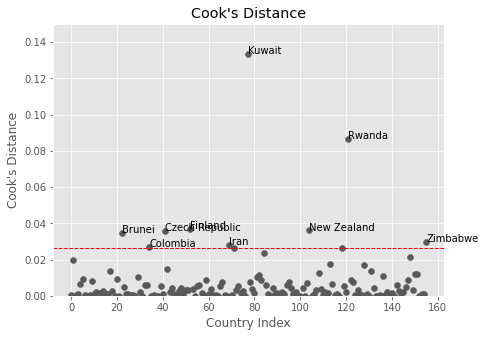

In [93]:
CooksD_outlier = pd.Series(CooksD_table["Cook's Distance"]).sort_values(ascending = False)[:9]

# plot 
fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(CooksD.index, CooksD["Cook's Distance"], color="0.35")
plt.axhline(y=0.026316, color='r', linestyle='--', linewidth=1 )
ax.set_ylim(0, 0.15)
ax.set_ylabel("Cook's Distance")
ax.set_xlabel('Country Index')
ax.set_title("Cook's Distance")
for i in CooksD_outlier.index:
    ax.annotate(country.country[i], xy=(CooksD.index[i], CooksD_outlier[i]))
plt.show()

### (l) List the countries and Cook’s D scores for any observation(s) above the threshold.


In [94]:
CooksD_table[(CooksD_table["Cook's Distance"] > 0.026316)]

,country,CooksD_cutoff,Cook's Distance
22,Brunei,0.026316,0.034823
34,Colombia,0.026316,0.026837
41,Czech Republic,0.026316,0.035662
52,Finland,0.026316,0.036949
69,Iran,0.026316,0.027989
77,Kuwait,0.026316,0.133505
104,New Zealand,0.026316,0.036083
121,Rwanda,0.026316,0.086748
155,Zimbabwe,0.026316,0.029682


### (m) Based on the information you have about this data,what would you do with the unusual cases and why?


<function matplotlib.pyplot.show>

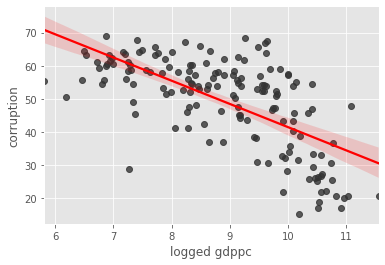

In [95]:
gdppc_log = np.log(corruption_data[["gdppc"]].values)
log_plot = sns.regplot(gdppc_log, corruption_data["corruption"], color="0.2", 
                       line_kws={'color':'red'})
log_plot.set(xlabel="logged gdppc")
plt.show

<function matplotlib.pyplot.show>

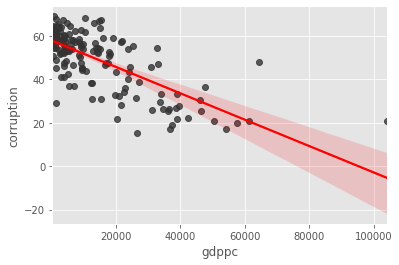

In [96]:
log_plot = sns.regplot(corruption_data["gdppc"], corruption_data["corruption"], color="0.2", 
                       line_kws={'color':'red'})
log_plot.set(xlabel="gdppc")
plt.show

In [97]:
corrpt_m2 = smf.ols(formula = "corruption ~ econfreedom + inequality + gdppc_log", data=corruption_data).fit()
# print(corrpt_m2.summary())

from statsmodels.iolib.summary2 import summary_col
corrpt_sum = summary_col([corrpt_m1, corrpt_m2], stars=True, float_format='%0.4f',
                  model_names=['Model\n(1)', 'Model\n(2)'], 
                  info_dict={'No. Observations':lambda x: "{0:d}".format(int(x.nobs)),
                             'R^2':lambda x: "{:.3f}".format(x.rsquared),
                             'adjusted R^2': lambda x: "{:.3f}".format(x.rsquared_adj),
                             'Residual Std. Errors': lambda x: "{:.3f}".format(x.mse_resid), 
                             'F-statistics': lambda x: "{:.3f}".format(x.f_pvalue),
                             'df': lambda x: "{:.1f}".format(x.df_model)})
print(corrpt_sum)


                       Model      Model   
                        (1)        (2)    
------------------------------------------
Intercept            83.9223*** 97.8636***
                     (6.7328)   (10.9073) 
econfreedom          -0.6365*** -0.7042***
                     (0.0807)   (0.0839)  
gdppc                -0.0003***           
                     (0.0001)             
gdppc_log                       -1.7775** 
                                (0.7811)  
inequality           1.2954***  1.6731*** 
                     (0.4683)   (0.5529)  
No. Observations     156        156       
R^2                  0.717      0.683     
adjusted R^2         0.711      0.676     
Residual Std. Errors 53.742     60.273    
F-statistics         0.000      0.000     
df                   3.0        3.0       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## 2. Still working with `corruption.csv`...

### (a) You hypothesize that the effect of inequality on corruption is conditional on state fragility (`fragility`). Create a dummy variable indicating whether a country’s fragility index is above or below the median and estimate a model regressing corruption on economic freedom, logged gdp per capita (you have to create this) and the interaction of inequality and whether a country is fragile. Report and briefly summarize the results.

The model shows that 
- 1 unit increase in the economic freedom index is on average associated with 0.7045 decrease in the corruption level, holding other variables constant;
- 1 percent increase in GDP per capita is on average associated with 0.0229 decrease in the corruption level, holding other variables constant;
- being a fragile state is on average associated with 12.9942 increase in the corruption leve, holding other variables constant;
- for stats that are considered as fragile, 1 unit increase in inequality is on average associated with (2.607-2.3582)=0.2488 increase in the corruption level, holding other variables constant;
- for stats that are not considered as fragile, 1 unit increase in inequality is on average associated with 2.607 increase in the corruption level, holding other variables constant.

In [98]:
corruption_data[["country",'fragility']]

,country,fragility
0,Afghanistan,107.900001
1,Albania,61.900002
2,Algeria,79.599998
3,Angola,87.900002
4,Argentina,47.599998
...,...,...
151,Uruguay,36.400002
152,Uzbekistan,85.300003
153,Venezuela,78.699997
154,Vietnam,72.400002


In [99]:
# create fragility dummy 
corruption_data.loc[corruption_data['fragility']>= corruption_data['fragility'].mean(), 'fragi_dum'] = 1
corruption_data.loc[corruption_data['fragility']< corruption_data['fragility'].mean(), 'fragi_dum'] = 0
corruption_data[["country","fragility", 'fragi_dum']]

,country,fragility,fragi_dum
0,Afghanistan,107.900001,1.0
1,Albania,61.900002,0.0
2,Algeria,79.599998,1.0
3,Angola,87.900002,1.0
4,Argentina,47.599998,0.0
...,...,...,...
151,Uruguay,36.400002,0.0
152,Uzbekistan,85.300003,1.0
153,Venezuela,78.699997,1.0
154,Vietnam,72.400002,1.0


In [100]:
corrpt_m3 = smf.ols(formula = "corruption ~ econfreedom  + gdppc_log + fragi_dum * inequality", data=corruption_data).fit()
# note on interection terms
## “:” adds a new column to the design matrix with the product of the other two columns. 
## “*” will also include the individual columns that were multiplied together:
print(corrpt_m3.summary())

                            OLS Regression Results                            
Dep. Variable:             corruption   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     68.49
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           5.57e-37
Time:                        17:08:19   Log-Likelihood:                -535.84
No. Observations:                 156   AIC:                             1084.
Df Residuals:                     150   BIC:                             1102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               99.1675 

### (b) How does the interpretation of the gdp per capita variable change from the previous question?

- With `gdppc`, Model (1) shows that 1 unit increase in GDP per capita is on average associated with 0.0003 decrease in the corruption level, holding other variables constant;

- With `gdppc_log`, Model (3) shows that __percent__ increase in GDP per capita is on average associated with 0.0229 decrease in the corruption level, holding other variables constant;

In [101]:
corrpt_sum2 = summary_col([corrpt_m1, corrpt_m2, corrpt_m3], stars=True, float_format='%0.4f',
                  model_names=['Model\n(1)', 'Model\n(2)', 'Model\n(3)'], 
                  info_dict={'No. Observations':lambda x: "{0:d}".format(int(x.nobs)),
                             'R^2':lambda x: "{:.3f}".format(x.rsquared),
                             'adjusted R^2': lambda x: "{:.3f}".format(x.rsquared_adj),
                             'Residual Std. Errors': lambda x: "{:.3f}".format(x.mse_resid), 
                             'F-statistics': lambda x: "{:.3f}".format(x.f_pvalue),
                             'df': lambda x: "{:.1f}".format(x.df_model)})
print(corrpt_sum2)


                       Model      Model      Model   
                        (1)        (2)        (3)    
-----------------------------------------------------
Intercept            83.9223*** 97.8636*** 99.1675***
                     (6.7328)   (10.9073)  (11.9584) 
econfreedom          -0.6365*** -0.7042*** -0.7045***
                     (0.0807)   (0.0839)   (0.0882)  
fragi_dum                                  12.9942** 
                                           (5.8654)  
fragi_dum:inequality                       -2.3582** 
                                           (0.9473)  
gdppc                -0.0003***                      
                     (0.0001)                        
gdppc_log                       -1.7775**  -2.2893***
                                (0.7811)   (0.8517)  
inequality           1.2954***  1.6731***  2.6070*** 
                     (0.4683)   (0.5529)   (0.6659)  
No. Observations     156        156        156       
R^2                  0.717 

### c) How do you interpret the results for the interaction term and its component parts?

- Being a fragile state is on average associated with 12.9942 increase in the corruption leve, holding other variables constant;

- For stats that are considered as fragile, 1 unit increase in inequality is on average associated with (2.607-2.3582)=0.2488 increase in the corruption level, holding other variables constant;

- For stats that are not considered as fragile, 1 unit increase in inequality is on average associated with 2.607 increase in the corruption level, holding other variables constant.

### (d) Plot the relationship between inequality and corruption for high and low fragility countries.

<function matplotlib.pyplot.show>

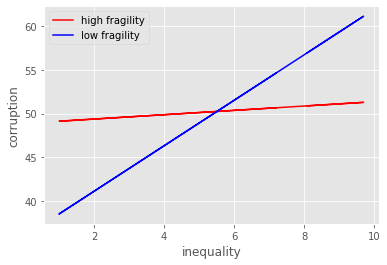

In [116]:
ineq = corruption_data[["inequality"]]
econf_m = float(corruption_data[["econfreedom"]].mean())
gdppclog_m = float(gdppc_log.mean())
c1 = 99.1675  - 0.7045 * econf_m - 2.2893 * gdppclog_m + 2.6070 * ineq +12.9942 * 1 - 2.3582 * (x * 1)
c2 = 99.1675  - 0.7045 * econf_m - 2.2893 * gdppclog_m + 2.6070 * ineq +12.9942 * 0 - 2.3582 * (0 * 1)

plt.plot(ineq, c1, "r",  label="high fragility")
plt.plot(ineq, c2, "b", label="low fragility")
plt.xlabel("inequality")
plt.ylabel("corruption")
plt.legend()
plt.show

### (e) What are the predicted corruption levels for high and low fragility countries at the minimum, median and maximum levels of inequality?

The  minimum, median and maximum levels of inequality are 1, 5.99, and 9.70 respectively. 

For high fragility countries, $$corruption = 99.1675 + 2.6070*inequality -2.3582 (1*inequality) = 99.1675 + 0.2428 * inequality$$. 

For low fragility countries, $$corruption = 99.1675 + 2.6070*inequality -2.3582 (0*inequality) = 99.1675 + 2.6070*inequality $$. 

Therefore, the predicted corruption levels 

|fragility|inequality|corruption|
|:------:|:--------:|:----------:|
|high|high| 101.58086|
|low | high| 124.4554|
|high|midium |100.658865|
|low |midium |114.79446|
|high|low|99.4163|
|low | low |   101.7745|




In [104]:
corruption_data[["inequality"]].describe()

,inequality
count,156.000000
mean,5.994231
std,1.958711
min,1.000000
25%,4.700000
50%,6.250000
75%,7.500000
max,9.700000


In [105]:
# predict corruption level
def corrpt_level(frag_dum, inequality):
    corrpt_level = 99.1675 + 2.6070*inequality -2.3582 *(frag_dum *inequality)
    return corrpt_level

print("high fragility, high inequality:", corrpt_level(1, corruption_data[["inequality"]].max()))
print("high fragility, midium inequality:", corrpt_level(1, corruption_data[["inequality"]].mean()))
print("high fragility, low inequality:", corrpt_level(1, corruption_data[["inequality"]].min()))
print("low fragility, high inequality:", corrpt_level(0, corruption_data[["inequality"]].max()))
print("low fragility, midium inequality:", corrpt_level(0, corruption_data[["inequality"]].mean()))
print("low fragility, low inequality:", corrpt_level(0, corruption_data[["inequality"]].min()))

high fragility, high inequality: inequality    101.58086
dtype: float64
high fragility, midium inequality: inequality    100.658865
dtype: float64
high fragility, low inequality: inequality    99.4163
dtype: float64
low fragility, high inequality: inequality    124.4554
dtype: float64
low fragility, midium inequality: inequality    114.79446
dtype: float64
low fragility, low inequality: inequality    101.7745
dtype: float64


### (f) What is the estimated effect of inequality for a low fragility country? (Include 95% confidence intervals.)

### (g) What is the estimated effect of inequality for a high fragility country? (Include 95% confidence intervals.)

$$V(X+Y)=V(X)+V(Y)+2Cov(X, Y)\\ 
V(aX)= a^2V(X)\\
Cov(aX, bY)=Cov(X, Y)*ab\\
V(X+aY)=V(X)+a^2V(Y)+2Cov(X, Y)*a$$

The estimated effect of inequality for a high fragility country is 38.2519 with 95% confidence interval at (29.724, 39.969);

The estimated effect of inequality for a low fragility country is 0.4434 with 95% confidence interval at (-0.108, 0.995); 

In [0]:
from scipy.stats import t

def interection_effect(var_xbeta, var_ybeta, cov_xybeta, dummy, alpha, n, k):
    interection_effect = round(var_xbeta +  var_ybeta *  (dummy**2)  + 2 * cov_xybeta * dummy, 4)
    CI_min = round(var_xbeta + var_ybeta * dummy - t.cdf(alpha, df=n-k) * math.sqrt(interection_effect), 3)
    CI_max = round(var_xbeta + var_ybeta * dummy + t.cdf(alpha, df=n-k) * math.sqrt(interection_effect), 3)
    return interection_effect, (CI_min, CI_max)

In [147]:
corrpt_m3.cov_params()

,Intercept,econfreedom,gdppc_log,fragi_dum,inequality,fragi_dum:inequality
Intercept,143.003408,-0.605915,-7.991105,-11.541243,-4.673367,0.069583
econfreedom,-0.605915,0.007773,-0.000028,0.082899,0.016144,-0.003176
gdppc_log,-7.991105,-0.000028,0.725325,-0.236667,0.166026,0.159958
fragi_dum,-11.541243,0.082899,-0.236667,34.403148,1.702689,-5.176281
inequality,-4.673367,0.016144,0.166026,1.702689,0.443374,-0.341787
fragi_dum:inequality,0.069583,-0.003176,0.159958,-5.176281,-0.341787,0.897470


In [154]:
vac_ineq = corrpt_m3.cov_params().loc["inequality"]["inequality"]
vac_fragi_dum = corrpt_m3.cov_params().loc["fragi_dum"]["fragi_dum"]
cov_ineq_fragi_dum = corrpt_m3.cov_params().loc["fragi_dum"]["inequality"]

print("effect of inequality for a high fragility country: \n", 
      interection_effect(vac_ineq, vac_fragi_dum, cov_ineq_fragi_dum, 1, 0.95, 156, 4))
print("effect of inequality for a low fragility country: \n", 
      interection_effect(vac_ineq, vac_fragi_dum, cov_ineq_fragi_dum, 0, 0.95, 156, 4))

effect of inequality for a high fragility country: 
 (38.2519, (29.724, 39.969))
effect of inequality for a low fragility country: 
 (0.4434, (-0.108, 0.995))
